# Data Storage and Manipulation with Pandas
We've taken a look at using Numpy arrays for data storage, now lets turn to another solution for organizing and manipulating data. This package is called Pandas and relies on "dataframe" objects which allow for more efficient labeling, indexing, and operations on large datasets. 

In [3]:
#Importing the package
import pandas as pd
pd.__version__

'0.24.2'

We can use pandas to create "series" objects which function much like arrays in numpy. Try running the following block of code to see how creating a series object works.

In [7]:
data = pd.Series([-2,-1,0,1,2])

In [13]:
data

0   -2
1   -1
2    0
3    1
4    2
dtype: int64

This series is stored with appropriate indecies, and we can extract both the values and indecies by running either data.values or data.indicies. Indexing into the series is done in the same way as numpy. 

In [14]:
print(data,"\n...........")
print(data.values,"\n...........")
print(data.index,"\n...........")
print(data[1])

0   -2
1   -1
2    0
3    1
4    2
dtype: int64 
...........
[-2 -1  0  1  2] 
...........
RangeIndex(start=0, stop=5, step=1) 
...........
-1


## Dataframes
Dataframes provide a nice way to store data with labels. Often when working with large datasets containing many different variables, it becomes helpful to referenece columns or rows by a label instead of a numbered index. There are many ways to build a pandas dataframe -- let's examine a couple. 

In [15]:
#Direct creaton of a dataframe with data
df1 = pd.DataFrame([2,4,6,8]) #indecies are automatically assigned (0,1,2,...)
df2 = pd.DataFrame([2,4,6,8],['human','dog','insect','spider']) #indecies are specified by second argument pd.DataFrame(data,indecies)
df3 = pd.DataFrame([2,4,6,8],['human','dog','insect','spider'],columns = ['Legs']) 

In [21]:
df3

,Legs
human,2
dog,4
insect,6
spider,8


In [23]:
df3['Legs']

human     2
dog       4
insect    6
spider    8
Name: Legs, dtype: int64

In [25]:
num_legs = [2,4,6,8]
index = ['human', 'dog', 'insect', 'spider']
cols = ['Legs']
df4 = pd.DataFrame(num_legs, index, cols)

In [26]:
df4

,Legs
human,2
dog,4
insect,6
spider,8


In [109]:
#Creation from numpy arrays
import numpy as np
x = np.arange(-5,5,1)
y = np.arange(10,101,10)
z = np.linspace(0,1,10)
matrix = [x,y,z]

df4 = pd.DataFrame(matrix).transpose()

In [110]:
matrix

[array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])]

In [111]:
df4

,0,1,2
0,-5.0,10.0,0.000000
1,-4.0,20.0,0.111111
2,-3.0,30.0,0.222222
3,-2.0,40.0,0.333333
4,-1.0,50.0,0.444444
5,0.0,60.0,0.555556
6,1.0,70.0,0.666667
7,2.0,80.0,0.777778
8,3.0,90.0,0.888889
9,4.0,100.0,1.000000


In [112]:
#Adding Column Names
cols = ['Col1','Col2','Col3']
df4.columns = cols

In [113]:
df4

,Col1,Col2,Col3
0,-5.0,10.0,0.000000
1,-4.0,20.0,0.111111
2,-3.0,30.0,0.222222
3,-2.0,40.0,0.333333
4,-1.0,50.0,0.444444
5,0.0,60.0,0.555556
6,1.0,70.0,0.666667
7,2.0,80.0,0.777778
8,3.0,90.0,0.888889
9,4.0,100.0,1.000000


In [77]:
df4['Col1'] * df4['Col2'] + df4['Col3']

0    -50.000000
1    -79.888889
2    -89.777778
3    -79.666667
4    -49.555556
5      0.555556
6     70.666667
7    160.777778
8    270.888889
9    401.000000
dtype: float64

In [108]:
#Index manipulation
#df4.set_index('Col1', inplace=True)
df4.reset_index(inplace=True, drop=True) #drop=False, inplace = False
df4

,level_0,index,Col1,Col2,Col3
0,0,0,-5.0,10.0,0.000000
1,1,1,-4.0,20.0,0.111111
2,2,2,-3.0,30.0,0.222222
3,3,3,-2.0,40.0,0.333333
4,4,4,-1.0,50.0,0.444444
5,5,5,0.0,60.0,0.555556
6,6,6,1.0,70.0,0.666667
7,7,7,2.0,80.0,0.777778
8,8,8,3.0,90.0,0.888889
9,9,9,4.0,100.0,1.000000


In [99]:
df4[1:2]

,Col1,Col2,Col3
1,-4.0,20.0,0.111111


In [118]:
#Viewing part of the data
df4.head(3)

,Col1,Col2,Col3
0,-5.0,10.0,0.000000
1,-4.0,20.0,0.111111
2,-3.0,30.0,0.222222


In [119]:
df4.tail()

,Col1,Col2,Col3
5,0.0,60.0,0.555556
6,1.0,70.0,0.666667
7,2.0,80.0,0.777778
8,3.0,90.0,0.888889
9,4.0,100.0,1.000000


In [132]:
#Adding a column
c4 = ['zero','one','two','three','four','five','six','seven','eight',9]
df4['Col4'] = c4

In [133]:
#Indexing into dataframes
df4[1:4]['Col4']

1      one
2      two
3    three
Name: Col4, dtype: object

In [136]:
df4.insert(2, 'Brian', c4)

In [137]:
df4

,Col1,Col2,Brian,Col3,Col4
0,-5.0,10.0,zero,0.000000,zero
1,-4.0,20.0,one,0.111111,one
2,-3.0,30.0,two,0.222222,two
3,-2.0,40.0,three,0.333333,three
4,-1.0,50.0,four,0.444444,four
5,0.0,60.0,five,0.555556,five
6,1.0,70.0,six,0.666667,six
7,2.0,80.0,seven,0.777778,seven
8,3.0,90.0,eight,0.888889,eight
9,4.0,100.0,9,1.000000,9


### Pulling in data from other sources
We can also use pandas to pull data from other sources. There are a plethora of ways data can be stored - SQL tables, txt, csv, pkl, etc. Finding the right application given a data source is as simple as a google search. 

For now, lets add some CSV data. Navigate to the github page and download "eddy.csv" and save to a location on your computer where you know where it lives. 

![](https://imgur.com/tluBCEZ.png)

![](https://imgur.com/ElrlfMk.png)


In [138]:
#Import csv data to dataframe
source = pd.read_csv('./data/source_data.csv')
tower = pd.read_csv('./data/tower_data.csv')

In [146]:
source.tail()

,EPOCH_TIME,LI_CO2,Local_DT
86390,1536213595,463.93,2018-09-05 23:59:55
86391,1536213596,463.44,2018-09-05 23:59:56
86392,1536213597,463.67,2018-09-05 23:59:57
86393,1536213598,461.94,2018-09-05 23:59:58
86394,1536213599,461.97,2018-09-05 23:59:59


In [142]:
import matplotlib.pyplot as plt #import the package

Text(0, 0.5, 'CO2 concentration (ppm)')

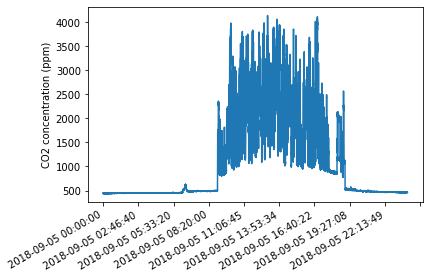

In [147]:
fig,ax = plt.subplots() #setup the figure

ax.plot(source['Local_DT'], source['LI_CO2']) #plot the data

ax.xaxis.set_major_locator(plt.MaxNLocator(10)) #set the number of x axis ticks

plt.gcf().autofmt_xdate() #get a nice date format for the x axis

plt.ylabel('CO2 concentration (ppm)')

In [153]:
tower['PIC_CO2'].min()

41.0

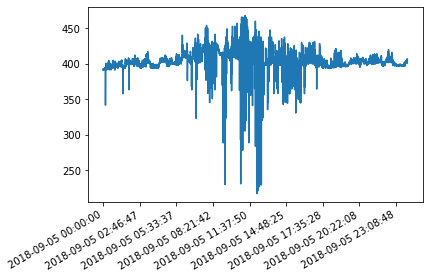

In [154]:
# Theshold: crude way to eleminate bad data...Data must be greater than 50
idx = tower['PIC_CO2']>50

fig,ax = plt.subplots() #setup the figure
ax.plot(tower['Local_DT'][idx],tower['PIC_CO2'][idx]) #plot the data
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  #set the number of x axis ticks
plt.gcf().autofmt_xdate() #get a nice date format for the x axis
plt.show()

In [155]:
#Clip the data to a shorter time window
DT1 = '2018-09-05 18:00:00'
DT2 = '2018-09-05 19:30:00'
source_clipped = source.loc[(source['Local_DT']>=DT1)&(source['Local_DT']<=DT2)].reset_index(drop=True)
tower_clipped = tower.loc[(tower['Local_DT']>=DT1)&(tower['Local_DT']<=DT2)].reset_index(drop=True)

In [156]:
source_clipped

,EPOCH_TIME,LI_CO2,Local_DT
0,1536192000,878.32,2018-09-05 18:00:00
1,1536192001,884.99,2018-09-05 18:00:01
2,1536192002,886.46,2018-09-05 18:00:02
3,1536192003,897.68,2018-09-05 18:00:03
4,1536192004,907.14,2018-09-05 18:00:04
5,1536192005,906.65,2018-09-05 18:00:05
6,1536192006,907.03,2018-09-05 18:00:06
7,1536192007,900.51,2018-09-05 18:00:07
8,1536192008,887.63,2018-09-05 18:00:08
9,1536192009,879.86,2018-09-05 18:00:09


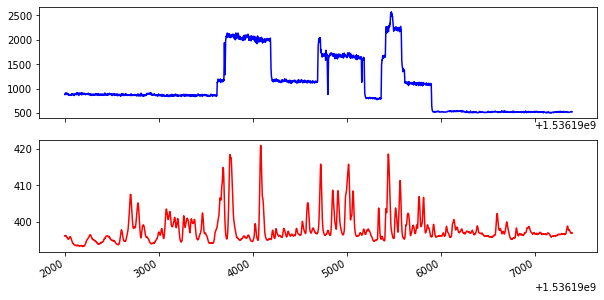

In [158]:
import matplotlib.gridspec as grd
fig = plt.figure(figsize=(10,5))
gs = grd.GridSpec(2,1)

ax = fig.add_subplot(gs[0])
ax.plot(source_clipped['EPOCH_TIME'],source_clipped['LI_CO2'],color='blue')

ax = fig.add_subplot(gs[1],sharex=ax)
ax.plot(tower_clipped['EPOCH_TIME'],tower_clipped['PIC_CO2'],color='red')

plt.gcf().autofmt_xdate()
plt.show()


### Concatenation
We can also merge dataframes together by index - in this case lets use the EPOCH_TIME. Sometimes some errors arise and we need to deal with them in unique ways. 

In [159]:
#Set epoch time as index concatenation
tower.index = tower['EPOCH_TIME']
del(tower['EPOCH_TIME'])
source.index = source['EPOCH_TIME']
del(source['EPOCH_TIME'])

#Ensure there are no duplicate epochs - I was getting an error when trying to concatenate for some reason
source = source[~source.index.duplicated(keep='first')]
tower = tower[~tower.index.duplicated(keep='first')]

In [160]:
full_df = pd.concat([tower,source],axis=1).dropna().drop('Local_DT',axis=1).reset_index()

In [161]:
full_df

,EPOCH_TIME,ANEM_X,ANEM_Y,ANEM_Z,PIC_CO2,LI_CO2
0,1.536127e+09,-0.017380,0.75190,-1.615440,391.272040,442.77
1,1.536127e+09,0.039850,0.65336,-1.503700,391.263090,442.67
2,1.536127e+09,0.023570,0.73497,-1.232400,391.226050,443.57
3,1.536127e+09,-0.197370,0.73389,-1.046050,391.253550,444.07
4,1.536127e+09,-0.318710,0.11953,-1.192360,391.283140,443.09
5,1.536127e+09,-0.245860,0.09060,-1.152320,391.310360,443.25
6,1.536127e+09,-0.382760,0.45786,-0.946040,391.376930,442.03
7,1.536127e+09,-0.157830,0.73423,-0.967120,391.361690,441.60
8,1.536127e+09,0.130370,0.74870,-1.060760,391.333290,443.11
9,1.536127e+09,0.385490,0.84916,-1.079510,391.282330,443.65


### Running functions on DataFrames
Often we will want to run functions using data within the dataframe to create a new column, much like what most people are familiar with doing in excel. Lets take a look at how to do this. 

In [162]:
def xy_speed(row):
    return np.sqrt(row['ANEM_X']**2+row['ANEM_Y']**2)


def direction(row):
    d = np.arctan2(row['ANEM_Y'],row['ANEM_X'])*180.0/np.pi
    if d < 0:
        return 360.0 + d
    else:
        return d

In [163]:
full_df['speed'] = full_df.apply(lambda row: xy_speed(row),axis=1)
full_df['direction'] = full_df.apply(lambda row: direction(row),axis=1)

In [164]:
full_df

,EPOCH_TIME,ANEM_X,ANEM_Y,ANEM_Z,PIC_CO2,LI_CO2,speed,direction
0,1.536127e+09,-0.017380,0.75190,-1.615440,391.272040,442.77,0.752101,91.324143
1,1.536127e+09,0.039850,0.65336,-1.503700,391.263090,442.67,0.654574,86.509716
2,1.536127e+09,0.023570,0.73497,-1.232400,391.226050,443.57,0.735348,88.163192
3,1.536127e+09,-0.197370,0.73389,-1.046050,391.253550,444.07,0.759967,105.052780
4,1.536127e+09,-0.318710,0.11953,-1.192360,391.283140,443.09,0.340387,159.441788
5,1.536127e+09,-0.245860,0.09060,-1.152320,391.310360,443.25,0.262022,159.771037
6,1.536127e+09,-0.382760,0.45786,-0.946040,391.376930,442.03,0.596775,129.894816
7,1.536127e+09,-0.157830,0.73423,-0.967120,391.361690,441.60,0.751002,102.131684
8,1.536127e+09,0.130370,0.74870,-1.060760,391.333290,443.11,0.759966,80.122212
9,1.536127e+09,0.385490,0.84916,-1.079510,391.282330,443.65,0.932564,65.583554
